In [ ]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from descartes import PolygonPatch
from tqdm import tqdm

In [ ]:
#THIS FILE IS NOT INCLUDED IN THE GITHUB REPOSITYORY! Because of its filesize of 850MB (too large for GitHub).
#BEFORE RUNNING THIS CODE, UNPACK THE FULL_DF.ZIP FILE! DO NOT COMMIT THE FILE TO THE REPO!
df = pd.read_csv("output/full_df.csv").drop(columns="Unnamed: 0")

In [ ]:
#Does the data load as intended?
df.head(5)

In [ ]:
df.columns

In [ ]:
df.shape

In [ ]:
#this is for the report~
#print(df.describe().round(2).T.drop(columns="count").to_latex(longtable=True))

In [ ]:
df.groupby("Neighborhood number")[df.columns[14:]].describe().round(2)

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df.corr())
plt.title("Correlation Matrix")
#plt.savefig('output/images/corr_full.png')

In [ ]:
p1 = df[df["size-of-std"]==0.5].assign(x="p1")
p2 = df[df["migrant-multiplier"]==0.5].assign(x="p2")
p3 = df[df["migrant-multiplier"]==2].assign(x="p3")
p4 = df[df["avg_migrant_income"]==16000].assign(x="p4")
p5 = df[df["avg_migrant_income"]==22000].assign(x="p5")

l1 = df[df["transform-houses?"]==True].assign(x="l1")
l2 = df[df["improve-health?"]==True].assign(x="l2")
l3 = df[df["increase-social-housing?"]==True].assign(x="l3")
l4 = df[df["build-more-houses?"]==True].assign(x="l4")
l5 = df[df["random-attributes?"]==True].assign(x="l5")
l6 = df[df["housing-market-inflation?"]==True].assign(x="l6")
l7 = df[df["mixed-use-zoning?"]==True].assign(x="l7")
l8 = df[df["improve-safety?"]==True].assign(x="l8")

In [ ]:
all_dfs = pd.concat([p1,p2,p3,p4,p5,l1,l2,l3,l4,l5,l6,l7,l8])

In [ ]:
all_dfs_melt = pd.melt(all_dfs, id_vars=["x"], var_name=["KPI"])

In [ ]:
sorted(all_dfs_melt["value"].unique())

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

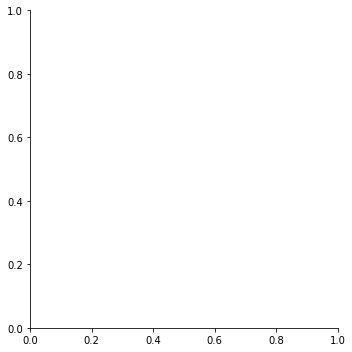

In [274]:
for KPI in df.columns[14:]:
    plt.Figure()
    sns.catplot(x="x",y="value",palette="tab20c",data=all_dfs_melt[all_dfs_melt["KPI"]==KPI],kind="boxen")
    plt.title("Average "+KPI+" given experimentation parameters")
    plt.show()

In [267]:
corr_list = []
for policy_df in [p1,p2,p3,p4,p5,l1,l2,l3,l4,l5,l6,l7,l8]:
    temp = df.mean()[df.columns[14:]].corr(policy_df.mean()[policy_df.columns[14:]],method="spearman")
    corr_list.append(temp)

In [268]:
columns = ['Neighborhood number','KPI-p-sc-lower', 'KPI-p-sc-working', 'KPI-p-sc-middle',
       'KPI-p-sc-upper', 'KPI-p-dutch', 'KPI-p-other-western',
       'KPI-p-antilles', 'KPI-p-morocco', 'KPI-p-suriname', 'KPI-p-turkey',
       'KPI-p-indonesian', 'KPI-p-eastern-eu', 'KPI-p-other-nonwestern']

In [269]:
#I really like how python doesn't store variables locally, so attempting to call the variable name string is impossible.
melted_nh = pd.melt(df[df["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_nh.name = "Total"
melted_p1_nh = pd.melt(p1[p1["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_p1_nh.name = "P1"
melted_p2_nh = pd.melt(p2[p2["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_p2_nh.name = "P2"
melted_p3_nh = pd.melt(p3[p3["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_p3_nh.name = "P3"
melted_p4_nh = pd.melt(p4[p4["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_p4_nh.name = "P4"
melted_p5_nh = pd.melt(p5[p5["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_p5_nh.name = "P5"
melted_l1_nh = pd.melt(l1[l1["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l1_nh.name = "L1"
melted_l2_nh = pd.melt(l2[l2["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l2_nh.name = "L2"
melted_l3_nh = pd.melt(l3[l3["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l3_nh.name = "L3"
melted_l4_nh = pd.melt(l4[l4["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l4_nh.name = "L4"
melted_l5_nh = pd.melt(l5[l5["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l5_nh.name = "L5"
melted_l6_nh = pd.melt(l6[l6["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l6_nh.name = "L6"
melted_l7_nh = pd.melt(l7[l7["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l7_nh.name = "L7"
melted_l8_nh = pd.melt(l8[l8["[step]"]==40].groupby("Neighborhood number").mean().reset_index()[columns], id_vars="Neighborhood number", var_name="KPI", value_name="percentage")
melted_l8_nh.name = "L8"

<Figure size 432x288 with 0 Axes>

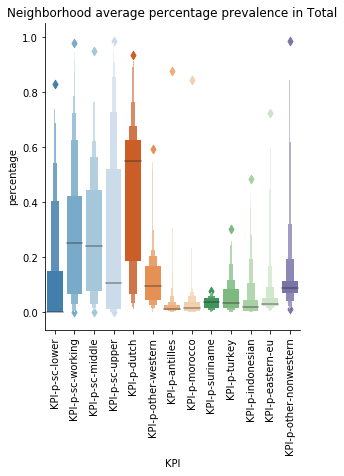

<Figure size 432x288 with 0 Axes>

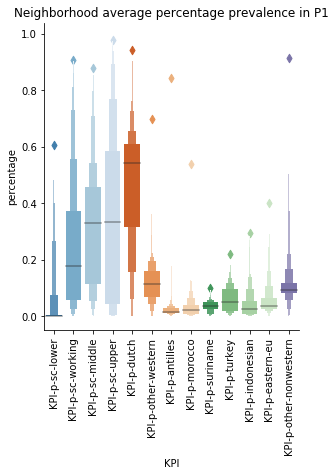

<Figure size 432x288 with 0 Axes>

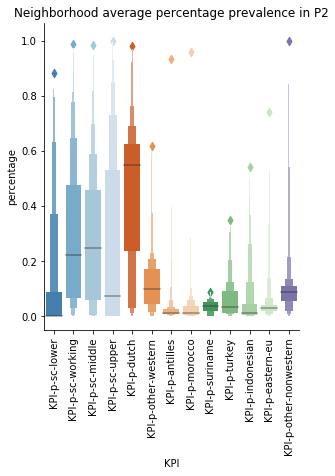

<Figure size 432x288 with 0 Axes>

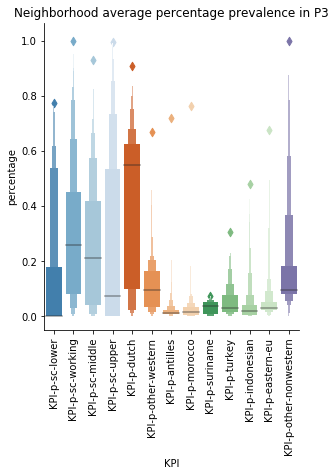

<Figure size 432x288 with 0 Axes>

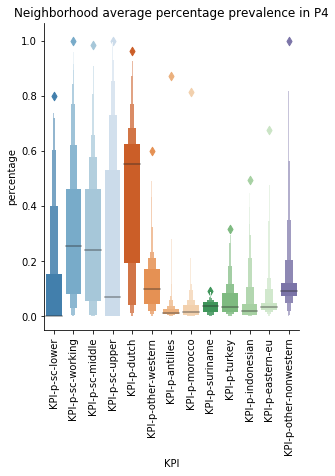

<Figure size 432x288 with 0 Axes>

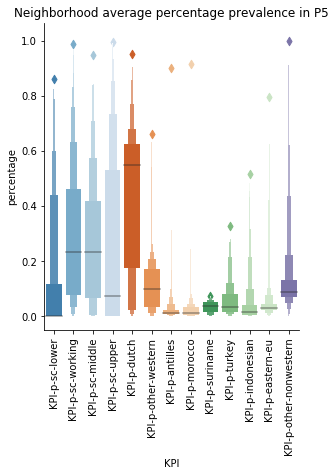

<Figure size 432x288 with 0 Axes>

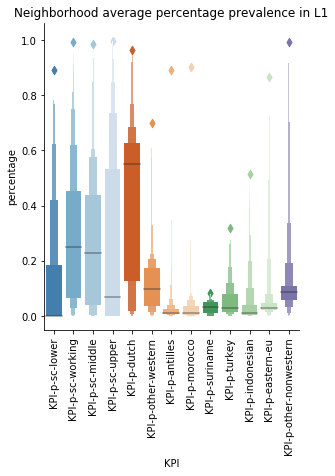

<Figure size 432x288 with 0 Axes>

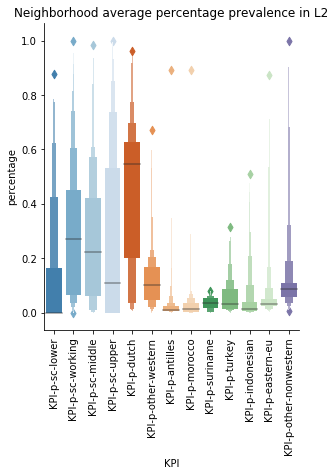

<Figure size 432x288 with 0 Axes>

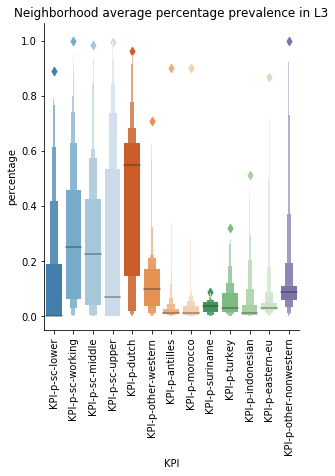

<Figure size 432x288 with 0 Axes>

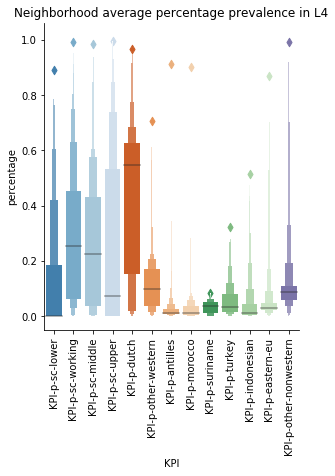

<Figure size 432x288 with 0 Axes>

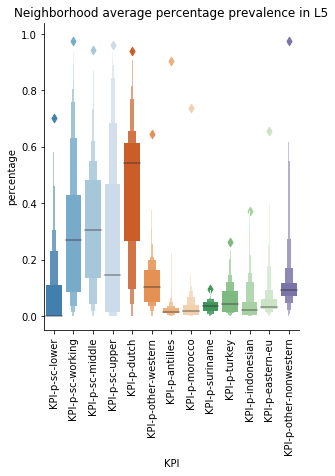

<Figure size 432x288 with 0 Axes>

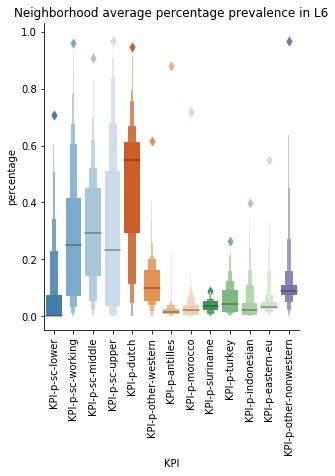

<Figure size 432x288 with 0 Axes>

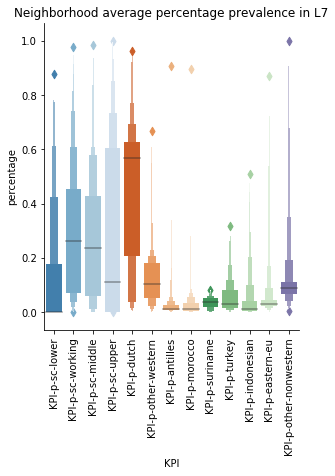

<Figure size 432x288 with 0 Axes>

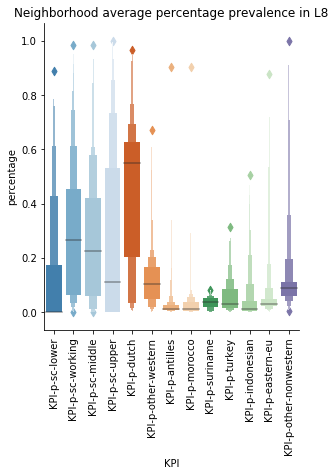

In [270]:
for melts_nh in [melted_nh,melted_p1_nh,melted_p2_nh,melted_p3_nh,melted_p4_nh,melted_p5_nh,melted_l1_nh,melted_l2_nh,melted_l3_nh,melted_l4_nh,melted_l5_nh,melted_l6_nh,melted_l7_nh,melted_l8_nh]:    
    plt.figure()
    sns.catplot(x="KPI",y="percentage",data=melts_nh,kind="boxen",palette="tab20c")
    plt.title("Neighborhood average percentage prevalence in " + melts_nh.name)
    plt.xticks(rotation=90)
    plt.show()

In [271]:
#Average homelessness with each policy lever
i = 1
l = []
for policy in [df,p1,p2,p3,p4,p5,l1,l2,l3,l4,l5,l6,l7,l8,df]:
    if i == 4: calc = 472600 - sum(policy[policy["[step]"]==40].groupby("Neighborhood number").mean()["KPI-citizen-count"])
    elif i == 3: calc = 304000 - sum(policy[policy["[step]"]==40].groupby("Neighborhood number").mean()["KPI-citizen-count"]) 
    else: calc = 360300 - sum(policy[policy["[step]"]==40].groupby("Neighborhood number").mean()["KPI-citizen-count"])
    print("P" + str(i) + " has an average of " + str(round(calc)) + " homeless people.")
    l.append(calc)
    i = i + 1

P1 has an average of 31677 homeless people.
P2 has an average of 120431 homeless people.
P3 has an average of 3203 homeless people.
P4 has an average of 93963 homeless people.
P5 has an average of 36490 homeless people.
P6 has an average of 7246 homeless people.
P7 has an average of 14292 homeless people.
P8 has an average of 14563 homeless people.
P9 has an average of 14339 homeless people.
P10 has an average of 14255 homeless people.
P11 has an average of 77138 homeless people.
P12 has an average of 95348 homeless people.
P13 has an average of 14489 homeless people.
P14 has an average of 14407 homeless people.
P15 has an average of 31677 homeless people.


Text(0.5, 1.0, 'Average homelessness given policy levers')

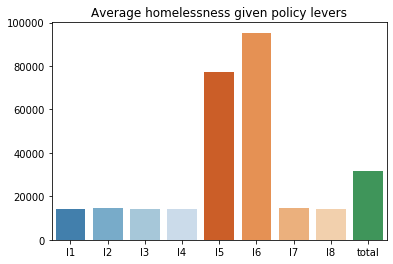

In [272]:
ticks = ["l1",'l2',"l3",'l4','l5','l6','l7','l8','total']
sns.barplot(x=ticks,y=l[6:],palette="tab20c")
plt.title("Average homelessness given policy levers")
#plt.savefig('output/images/avg_homeless.png')

Text(0.5, 1.0, 'Average homelessness given experimentation parameters')

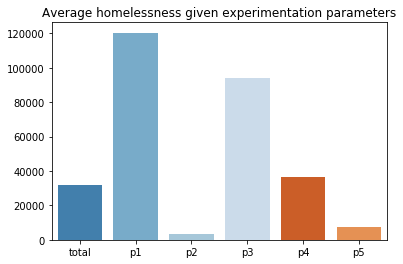

In [273]:
ticks = ["total","p1","p2","p3","p4",'p5']
sns.barplot(x=ticks,y=l[:6],palette="tab20c")
plt.title("Average homelessness given experimentation parameters")
#plt.savefig('output/images/avg_homeless.png')